In [30]:
import MetaTrader5 
import pandas as pd
import pandas_ta as ta
from datetime import datetime
import pytz
import os
mt5 = MetaTrader5
SYMBOL = "XAUUSD"
TIMEFRAME = mt5.TIMEFRAME_H1
TOTAL_CANDLES = 600

timezone = pytz.timezone('Etc/UTC')
START_DATE =datetime(2025, 6, 1, tzinfo=timezone)
END_DATE =datetime(2025, 12, 1, tzinfo=timezone)


SYMBOL = "XAUUSD"
TIMEFRAME

# inisialisasi ke MetaTrader 5
if not mt5.initialize():
    print(f"Connection failed : {mt5.last_error()}")
    quit()

# Pengambilan data dan pembersihan kolom yang tidak diperlukan 
rates = mt5.copy_rates_range(SYMBOL, TIMEFRAME, START_DATE, END_DATE)
mt5.shutdown()
df = pd.DataFrame(rates)
df.drop(columns=['spread', 'real_volume'], inplace=True) # <<<<<< Kolom yang tidak diperlukan
df['time'] = pd.to_datetime(df['time'], unit='s') # merubah waktu delam bentuk standart agar bisa digunakan

df.rename(columns={'time': 'Time','open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'tick_volume': 'Volume'}, inplace=True) # Stabdarisasi nama kolom
df.to_csv(f'{SYMBOL}.csv', index=False)
df.head(10)

,Time,Open,High,Low,Close,Volume
0,2025-06-02 01:00:00,3298.26,3315.12,3295.92,3313.18,5631
1,2025-06-02 02:00:00,3313.18,3316.66,3309.23,3310.24,3681
2,2025-06-02 03:00:00,3310.24,3314.97,3303.34,3311.36,6293
3,2025-06-02 04:00:00,3311.36,3313.65,3301.48,3303.72,6958
4,2025-06-02 05:00:00,3303.72,3311.52,3303.50,3307.38,5082
5,2025-06-02 06:00:00,3307.38,3308.90,3303.34,3308.65,4414
6,2025-06-02 07:00:00,3308.64,3318.18,3308.64,3313.91,4875
7,2025-06-02 08:00:00,3313.91,3325.69,3313.86,3323.79,5583
8,2025-06-02 09:00:00,3323.79,3345.40,3323.79,3344.47,9340
9,2025-06-02 10:00:00,3344.47,3359.03,3343.22,3352.62,10554


In [77]:
df = pd.read_csv(f'{SYMBOL}.csv', index_col='Time')

df.ta.sma(length=20, append=True)
df.ta.sma(length=50, append=True)
df.ta.sma(length=100, append=True)
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,SMA_20,SMA_50,SMA_100
Time,,,,,,,,
2025-06-06 08:00:00,3373.68,3375.60,3362.08,3366.20,7168,3367.2590,3366.7816,3360.3662
2025-06-06 09:00:00,3366.10,3366.98,3356.18,3360.80,10509,3365.8175,3366.6856,3360.8424
2025-06-06 10:00:00,3360.80,3362.38,3352.80,3359.48,8727,3363.7925,3366.6916,3361.3348
2025-06-06 11:00:00,3359.48,3367.75,3358.45,3365.41,7112,3362.4450,3366.9036,3361.8753
2025-06-06 12:00:00,3365.41,3365.45,3352.90,3356.78,7085,3361.1325,3367.0176,3362.4059
...,...,...,...,...,...,...,...,...
2025-11-28 17:00:00,4198.29,4203.95,4185.75,4203.72,12220,4177.3935,4165.8644,4145.3070
2025-11-28 18:00:00,4203.79,4210.77,4197.86,4206.25,11163,4179.8160,4166.7874,4146.8351
2025-11-28 19:00:00,4206.57,4217.10,4204.42,4217.10,11140,4182.7075,4167.6976,4148.4060


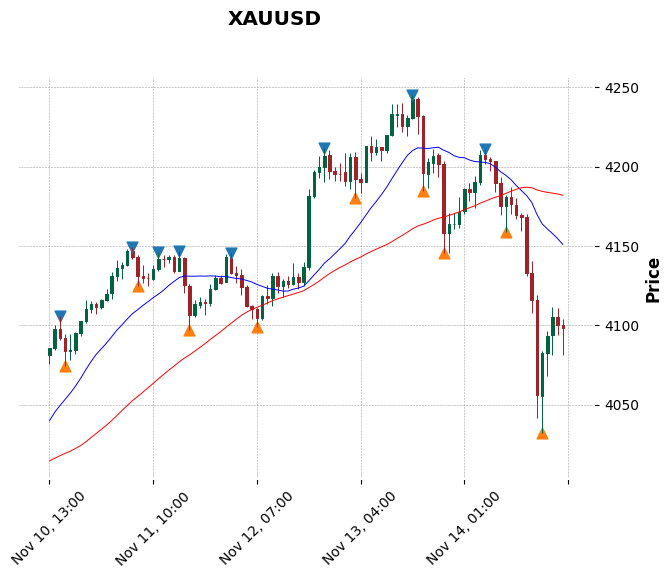

In [105]:
import mplfinance

mpf = mplfinance

df = pd.read_csv(f'{SYMBOL}.csv', index_col='Time')
df.ta.sma(length=20, append=True)
df.ta.sma(length=50, append=True)
df.dropna(inplace=True)

def detect_swings(df, window=3):
    df['swing_high'] = df['High'][
        df['High'] == df['High'].rolling(window*2+1, center=True).max()
    ]
    
    df['swing_low'] = df['Low'][
        df['Low'] == df['Low'].rolling(window*2+1, center=True).min()
    ]
    
    return df
detect_swings(df)

df.index = pd.to_datetime(df.index)
df = df.iloc[2600:2700:]
add = [
    mpf.make_addplot(df['SMA_20'], color='blue', width= 0.7),
    mpf.make_addplot(df['SMA_50'], color='red', width= 0.7),
    mpf.make_addplot(df['swing_high'], type='scatter', marker='v', markersize=60),
    mpf.make_addplot(df['swing_low'], type='scatter', marker='^', markersize=60)
]

mpf.plot(df, type='candle', style='charles', title='XAUUSD', addplot=add)